Checking the cases volume

In [29]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [30]:
tqdm.pandas()

In [31]:
df = pd.read_excel(r'raw\Client Case\lm legalcase 2022-06-06T2054.xlsx', sheet_name = 'Sheet1')

c:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [32]:
df['Case Posted Month'] = pd.to_datetime(df['Case Posted Month'])

In [33]:
df['Case Posted Month'][0].year

2022

In [34]:
df = df[[True if x.year >= 2022 else False for x in df['Case Posted Month'] ]].copy()

# Overall Case Count Trend

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 904
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Case Posted Month         905 non-null    datetime64[ns]
 1   Categories Category Name  905 non-null    object        
 2   Case Case Count           905 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 28.3+ KB


In [36]:
# Y

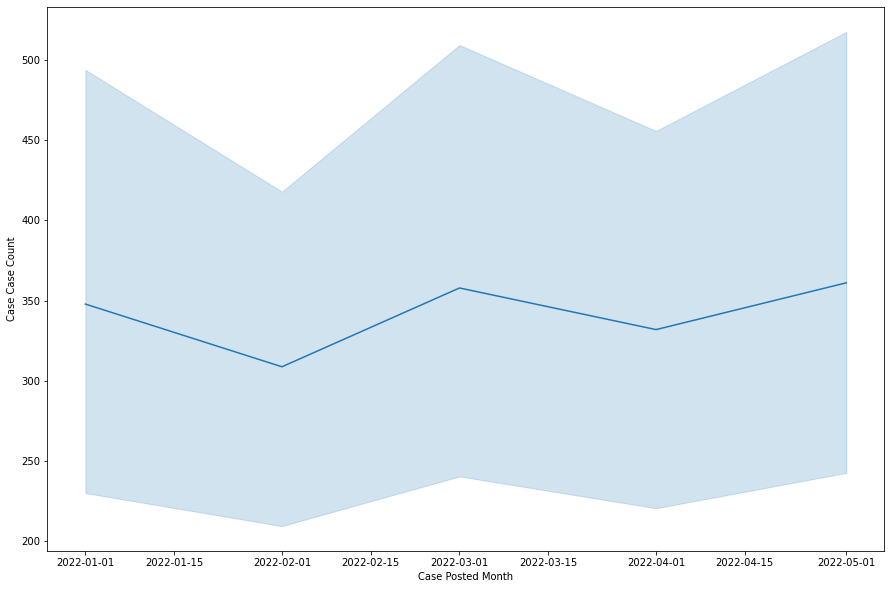

In [37]:
plt.figure(figsize = (15,10))
ax = sns.lineplot(data = df, x = "Case Posted Month", y ="Case Case Count")
# _ = ax.set_xticklabels(labels = df['Case Posted Month'], rotation = 90)

Insights:
1. Overall volume of that we received has an increasing trend 

### Getting the specific practice areas

In [38]:
case_practice_area_volume = df.pivot_table(index = 'Categories Category Name', values = 'Case Case Count', aggfunc = 'sum').sort_values(by = 'Case Case Count', ascending = False)

In [39]:
case_practice_area_volume.head()

,Case Case Count
Categories Category Name,
Child Custody and Visitation,41992
Child Support,21020
Wrongful Termination,18034
Landlord and Tenant,14333
Employment Discrimination,13690


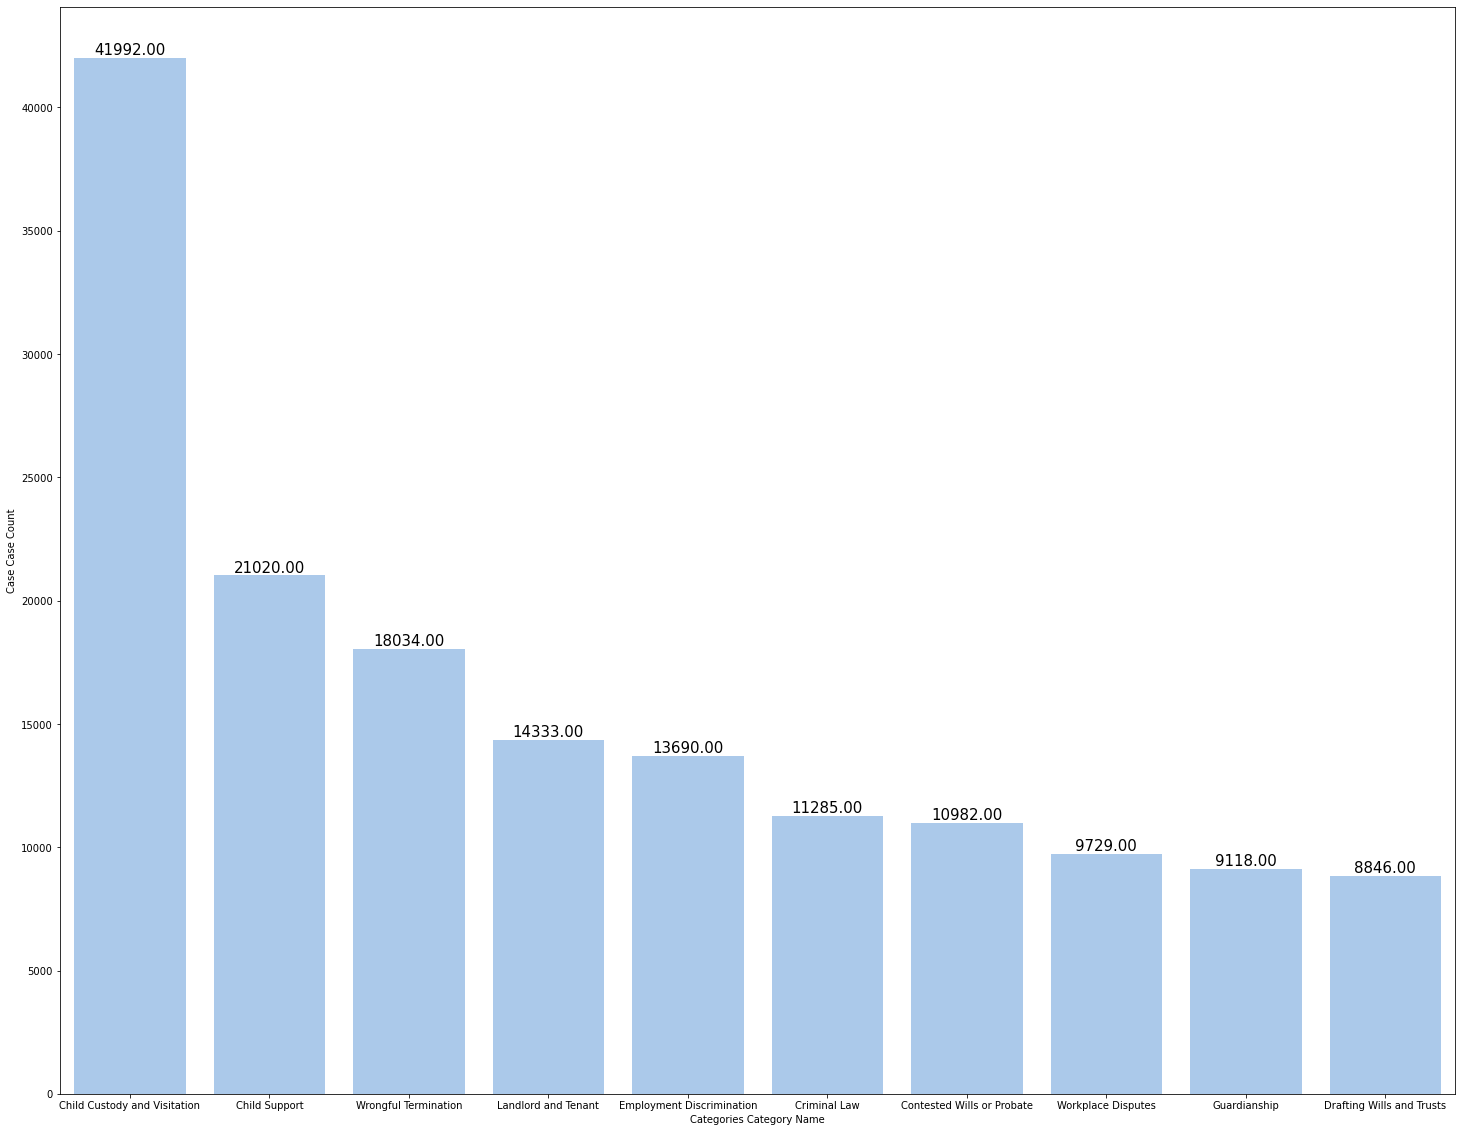

In [40]:
sns.set_color_codes('pastel')
plt.figure(figsize= (25,20))
ax = sns.barplot(data = case_practice_area_volume.head(10), x = case_practice_area_volume.head(10).index, y = 'Case Case Count', color = 'b')
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')